In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
df = pd.read_csv('../data/final_calls_weather_tfk.csv')

In [37]:
# NOTE: features[N:M] actually is features[N] through features [M-1] -- it's non-inclusive

# features[0]       --- 'CAD_INCIDENT_ID'                                            ---- DROP (only an index)
# features[1]       --- 'INITIAL_SEVERITY_LEVEL_CODE'
# features[2]       --- 'FINAL_SEVERITY_LEVEL_CODE'
# features[3]       --- 'FIRST_ASSIGNMENT_DATETIME'                                  ---- DROP
# features[4]       --- 'VALID_DISPATCH_RSPNS_TIME_INDC' 
# features[5]       --- 'DISPATCH_RESPONSE_SECONDS_QY'                               ---- DROP
# features[6]       --- 'FIRST_ACTIVATION_DATETIME' 
# features[7]       --- 'VALID_INCIDENT_RSPNS_TIME_INDC'
# features[8]       --- 'INCIDENT_RESPONSE_SECONDS_QY'                               ------> y
# features[9]       --- 'INCIDENT_TRAVEL_TM_SECONDS_QY'
# features[10]      --- 'INCIDENT_CLOSE_DATETIME' 
# features[11]      --- 'HELD_INDICATOR' 
# features[12]      --- 'REOPEN_INDICATOR'
# features[13]      --- 'SPECIAL_EVENT_INDICATOR' 
# features[14]      --- 'STANDBY_INDICATOR'
# features[15]      --- 'TRANSFER_INDICATOR'
# features[16:96]   --- 'INITIAL_CALL_TYPE' dummies
# features[96:186]  --- 'FINAL_CALL_TYPE' dummies
# features[186:195] --- 'INCIDENT_DISPOSITION_CODE' dummies
# features[195:198] --- 'BOROUGH' dummies
# features[198:230] --- 'INCIDENT_DISPATCH_AREA' dummies
# features[230:594] --- 'ZIPCODE' dummies
# features[594:670] --- 'POLICEPRECINCT' dummies
# features[670:720] --- 'CITYCOUNCILDISTRICT' dummies
# features[720:788] --- 'COMMUNITYDISTRICT' dummies
# features[788:819] --- 'COMMUNITYSCHOOLDISTRICT' dummies
# features[829:831] --- 'CONGRESSIONALDISTRICT' dummies
# features[831]     --- 'CALL_YEAR'
# features[832]     --- 'CALL_DAY'
# features[833]     --- 'CALL_TIME'
# features[834]     --- 'CALL_UTC'
# features[835:846] --- 'CALL_MONTH' dummies
# features[846]     --- 'CALL_MONTH' (numeric)
# features[847]     --- 'AWIND'
# features[848]     --- 'PRCP'
# features[849]     --- 'SNOW'
# features[850]     --- 'SNWD'
# features[851]     --- 'TMAX'
# features[852]     --- 'TMIN'
# features[853]     --- 'TAVG_CALC'

In [38]:
df['num_calls'].describe()

count    25465.000000
mean       136.328569
std         54.236394
min          3.000000
25%         88.000000
50%        128.000000
75%        184.000000
max        429.000000
Name: num_calls, dtype: float64

In [39]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'year', 'month', 'day', 'hour',
       'num_calls', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS',
       'RICHMOND / STATEN ISLAND', 'UNKNOWN', 'STATION', 'NAME', 'DATE',
       'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TAVG_CALC',
       'Traffic Incidents'],
      dtype='object')

In [40]:
# Clean Data and Remove features that would outright count up to the total number of calls
features = ['Unnamed: 0', 'Unnamed: 0.1', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 
            'RICHMOND / STATEN ISLAND', 'UNKNOWN', 'NAME', 'num_calls', 'DATE']


X = df.drop(columns= features)

X = X.fillna(X['AWND'].mean())

X = pd.get_dummies(data = X, columns = ['STATION'], drop_first = True)

y = df['num_calls']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [41]:
X.columns

Index(['year', 'month', 'day', 'hour', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'TMIN', 'TAVG_CALC', 'Traffic Incidents'],
      dtype='object')

In [42]:
# scaling data
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [43]:
X = X.fillna(X['AWND'].mean())

In [44]:
# linear regression is go to for modelling since it is the simplest in this case
linreg = LinearRegression()

linreg.fit(X_train_sc, y_train)

print(f'Training: {linreg.score(X_train_sc, y_train)}')
print(f'Testing: {linreg.score(X_test_sc, y_test)}')

Training: 0.5144276829337519
Testing: 0.5188483809790554


This does not seem likely, not sure yet why this is the result but there is definitely something not quite right here.

In [45]:
lasso = Lasso(max_iter = 10_000)

lasso.fit(X_train_sc, y_train)

print(f'Training: {lasso.score(X_train_sc, y_train)}')
print(f'Testing: {lasso.score(X_test_sc, y_test)}')

Training: 0.5120454233455058
Testing: 0.5163948752009309


In [46]:
ridge = Ridge()

ridge.fit(X_train_sc, y_train)

print(f'Training: {ridge.score(X_train_sc, y_train)}')
print(f'Testing: {ridge.score(X_test_sc, y_test)}')

Training: 0.5144276816478912
Testing: 0.5188484599641534


**I realized the issue here.  Left in a lot of data that was used to create our new dependent variable.  This has been corrected more or less.**

### **Neural Nets: Predicting Call Volumes**

In [47]:
X_train_sc.shape

(19098, 12)

In [48]:
# making no changes, I want the NNet baseline
# Insert model here...
model = Sequential()

model.add(Dense(128, activation = 'relu', input_shape = (12,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))

model.add(Dense(1, activation = None))

#compile the model
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

# fit the model
results = model.fit(X_train_sc, y_train,
                    batch_size = 100,
                    epochs = 250, 
                    validation_data = (X_test_sc, y_test),
                    verbose = 1)



Epoch 1/250
191/191 [==============================] - 1s 3ms/step - loss: 13364.7992 - mae: 97.2732 - val_loss: 1867.4083 - val_mae: 34.3947
Epoch 2/250
191/191 [==============================] - 0s 2ms/step - loss: 1729.0116 - mae: 33.1219 - val_loss: 1540.7322 - val_mae: 31.4156
Epoch 3/250
191/191 [==============================] - 0s 2ms/step - loss: 1540.0927 - mae: 31.0258 - val_loss: 1377.6001 - val_mae: 29.6936
Epoch 4/250
191/191 [==============================] - 0s 2ms/step - loss: 1380.4523 - mae: 29.3440 - val_loss: 1208.0341 - val_mae: 27.6213
Epoch 5/250
191/191 [==============================] - 0s 2ms/step - loss: 1156.7756 - mae: 26.8369 - val_loss: 951.9470 - val_mae: 24.2269
Epoch 6/250
191/191 [==============================] - 0s 2ms/step - loss: 882.1051 - mae: 23.1614 - val_loss: 677.9046 - val_mae: 20.3166
Epoch 7/250
191/191 [==============================] - 0s 2ms/step - loss: 654.5568 - mae: 19.8745 - val_loss: 603.5363 - val_mae: 18.7212
Epoch 8/250
191/1

In [49]:
results.history['mae'][-1]

15.161718368530273

In [50]:
results.history['val_mae'][-1]

16.74115753173828

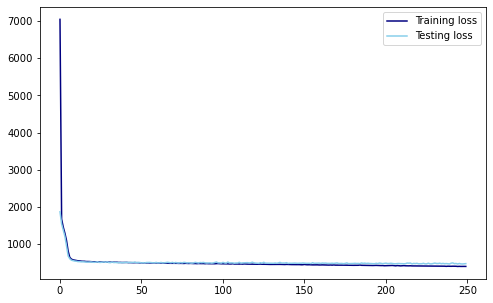

In [51]:
# Visualize the loss
train_loss = results.history['loss']
test_loss =  results.history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

Mean Squared Error drops this into the range of being within 21 calls per hour.

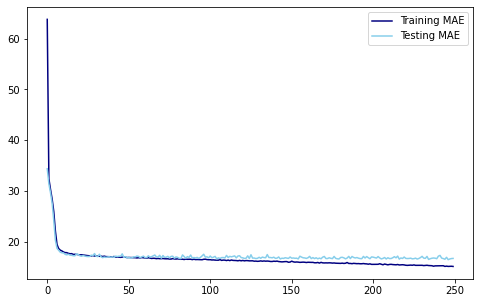

In [52]:
# visualising mean accuracy error
train_mae = results.history['mae']
test_mae =  results.history['val_mae']

plt.figure(figsize=(8, 5))
plt.plot(train_mae, label='Training MAE', color='navy')
plt.plot(test_mae, label='Testing MAE', color='skyblue')
plt.legend();

MAE results are interesting since this would suggest we can get within 17 calls for predictions BUT it is important to note that this does not penalize large errors as harshly as RMSE does.  Since we want to avoid large mistakes (we're talking emergency/life and death situations) we do want to use RMSE instead of MAE.

In [53]:
preds = model.predict(X_test_sc)
y_df = pd.DataFrame(y_test)

In [54]:
y_df['preds'] = preds
y_df['error'] = (y_df['preds'] - y_df['num_calls'])
y_df[['num_calls', 'preds']].describe()

,num_calls,preds
count,6367.000000,6367.000000
mean,136.157845,134.268570
std,54.344129,49.656021
min,36.000000,50.258030
25%,88.000000,88.880684
50%,127.000000,122.294922
75%,185.000000,182.385872
max,377.000000,261.466064


Interesting thing to note here (at least I think so) is that the mean and std are very close between num_calls and preds but preds do not even come close to the top end of actual maximum num_calls being off by a full 120 calls.  Other wise this would seem to indicate a pretty solid result for predicting call volumes.  Outliers will be outliers and we will never get close to seeing a disaster scenario coming but hopefully this will account for most situations within what we might consider the norm.

In [55]:
train_preds = model.predict(X_train_sc)

training =  r2_score(y_train, train_preds)
testing = r2_score(y_test, preds)

print(f'Training: {training}')
print(f'Testing: {testing}')

Training: 0.8676335518449162
Testing: 0.840234343111754


In [56]:
sqrt(mean_squared_error(y_train, train_preds)), sqrt(mean_squared_error(y_test, preds))

(19.719267252428562, 21.72002101590659)

### **Recurrent Neural Network**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.optimizers import Adam

In [27]:
df = pd.read_csv('../data/final_calls_weather_tfk.csv')

df['DATE'] = pd.to_datetime(df['DATE'])

df.set_index(df['DATE'], inplace = True)

In [28]:
X = df.drop(columns = ['num_calls', 'BROOKLYN', 'BRONX' ,'MANHATTAN', 
                       'UNKNOWN','Unnamed: 0', 'RICHMOND / STATEN ISLAND','DATE', 'Unnamed: 0.1'
                       ])
y = df['num_calls']

X = pd.get_dummies(X, columns = ['STATION'])
X = pd.get_dummies(X, columns = ['NAME'])

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [29]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length = 3, batch_size = 64)

test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=3, batch_size = 64)

d =train_sequences[0][0][0].shape

In [30]:
stop = EarlyStopping(monitor = 'mae', patience = 10, min_delta = .01)

# set up structure
model = Sequential()
model.add(GRU(8, input_shape=d, return_sequences=True))
model.add(GRU(8, return_sequences=False))

model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation=None))

# compile
model.compile(optimizer=Adam(lr=.0005), loss='mse', metrics=['mae'])

results = model.fit(train_sequences, 
          epochs = 100,
          batch_size = 256,
          validation_data = test_sequences,
          callbacks = stop,
                   verbose = 0)

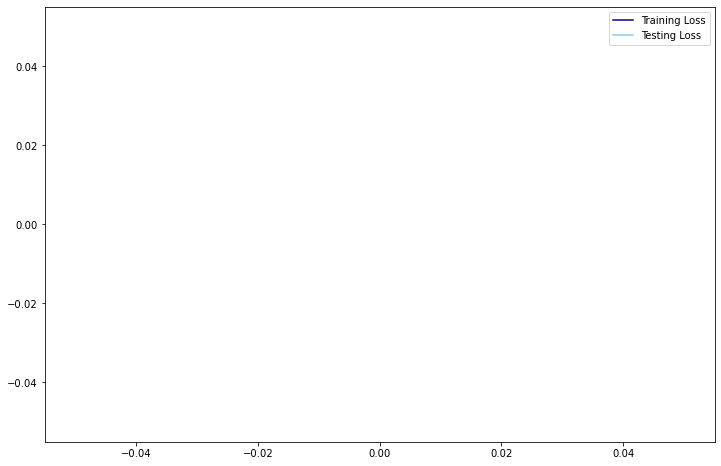

In [31]:
train_mae = results.history['loss']
test_mae =  results.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_mae, label='Training Loss', color='navy')
plt.plot(test_mae, label='Testing Loss', color='skyblue')
plt.legend();